In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as pt

f_path = r"C:\Users\admin\geopython\L4\E4\dataE4\TravelTimes_to_5975373_Forum.csv"

shp_path = r"C:\Users\admin\geopython\L4\E4\dataE4\MetropAccess_YKR_grid_EurefFIN.shp"

data = pd.read_csv(f_path,sep=',',encoding='latin1')
#(fp_cl,sep=';',encoding='latin1')

#progress check
#data.head(5)

data.columns

#sel_cols = ["pt_r_tt","car_r_t","from_id","to_id"]
#selected_cols = ['pt_r_tt','car_r_t','from_id','to_id']

#data = data [selected_cols]

data = data[['pt_r_tt', 'car_r_t', 'from_id','to_id']].copy()

#rename columns pt_r_tt and Car_r_t

data.rename(columns={'pt_r_tt':'public_trans','car_r_t':'car',}, inplace=True)

#progress check
data.head(5)




,public_trans,car,from_id,to_id
0,137,49,5785640,5975373
1,134,49,5785641,5975373
2,134,57,5785642,5975373
3,144,60,5785643,5975373
4,121,48,5787544,5975373


In [2]:
poly_shp = gpd.read_file(shp_path)

poly_shp.head()

#check for data types

#display(data.dtypes)
#display(poly_shp.dtypes)

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ..."


In [7]:


merged = poly_.merge(data,how="inner",left_on="YKR_ID",right_on='from_id')

merged.head()

,x,y,YKR_ID,geometry,public_trans,car,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,...",137,49,5785640,5975373
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3...",134,49,5785641,5975373
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,...",134,57,5785642,5975373
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,...",144,60,5785643,5975373
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ...",121,48,5787544,5975373


In [8]:
import pysal as ps

#create classifier
classifier = ps.Equal_Interval.make(k=5)

#apply classes to both modes of transportation
merged['public_trans_classes'] = merged[['public_trans']].apply(classifier)


merged['car_classes'] = merged[['car']].apply(classifier)


merged.head()

,x,y,YKR_ID,geometry,public_trans,car,from_id,to_id,public_trans_classes,car_classes
0,381875.0,6697880.0,5785640,"POLYGON ((382000.0001388059 6697750.000128186,...",137,49,5785640,5975373,3,3
1,382125.0,6697880.0,5785641,"POLYGON ((382250.00013875 6697750.000128181, 3...",134,49,5785641,5975373,3,3
2,382375.0,6697880.0,5785642,"POLYGON ((382500.0001386951 6697750.000128172,...",134,57,5785642,5975373,3,3
3,382625.0,6697880.0,5785643,"POLYGON ((382750.0001386406 6697750.000128165,...",144,60,5785643,5975373,3,3
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000138978 6697500.000128254, ...",121,48,5787544,5975373,3,3


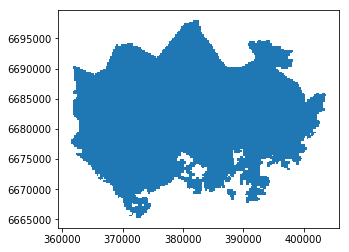

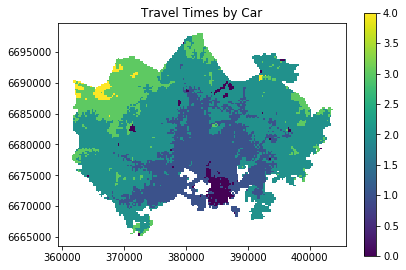

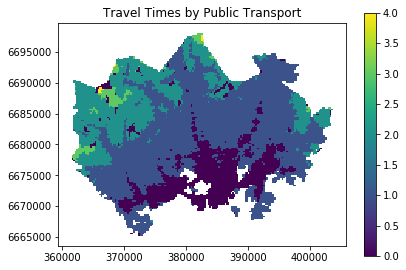

In [15]:
import matplotlib.pyplot as pt
import geopandas as gpd
import matplotlib.cm as cm


poly_shp.plot()

merged.plot(column="car_classes", linewidth=0,legend=True);
pt.title("Travel Times by Car")
pt.tight_layout()

merged.plot(column="public_trans_classes", linewidth=0,legend=True);
pt.title("Travel Times by Public Transport")
pt.tight_layout()